In [1]:
import numpy as np
from pyESN.pyESN import ESN
from matplotlib import pyplot as plt
from utils import *
from scipy.signal import periodogram,decimate
eeg = get_eeg_by_fileindex(1)
metadata = read_metadata_by_fileindex(1)
eeg = decimate(eeg, q=10).reshape(-1, 1)

(100000, 1)

([<matplotlib.axis.YTick at 0x7fda9fc1a2f0>,
 [Text(0, -0.0008, '-0.0008'),
  Text(0, -0.0006000000000000001, '-0.0006'),
  Text(0, -0.0004, '-0.0004'),
  Text(0, -0.00019999999999999998, '-0.0002'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.00019999999999999998, '0.0002'),
  Text(0, 0.0004000000000000001, '0.0004'),
  Text(0, 0.0006, '0.0006'),
  Text(0, 0.0008, '0.0008')])

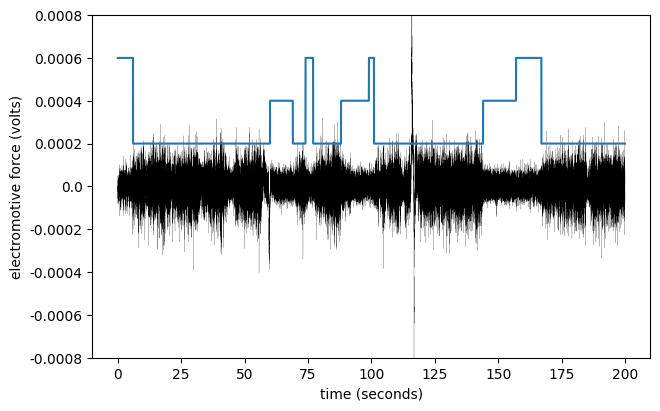

In [68]:
labels = metadata['label'][3900:4100]
labels_idx = labels.index
data = eeg[3900*500:(4100*500)]
l = np.array([0])
for label in labels:
    l = np.hstack((l,[label]*500))
l = np.delete(l,0)
plt.figure(figsize=(7.2,4.45))
plt.plot(np.linspace(0,200,100000),data,linewidth=.1,color='black')
plt.plot(np.linspace(0,200,100000),(l/2500)+.0002)
plt.ylim(-.00065,.00065)
plt.ylabel('electromotive force (volts)')
plt.xlabel('time (seconds)')
yticks,yticklabels = plt.yticks()
yticklabels[7] = 'Wake'
yticklabels[6] = 'REM'
yticklabels[5] = 'NREM'
plt.yticks(yticks,[-.0008,-.0006,-.0004,-.0002,.0000,'NREM','REM','Wake',.0008])
# plt.savefig('ex_hyp.pgf',bbox_inches='tight')
